In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-04-06 18:16:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   172MB/s    in 0.4s    

2021-04-06 18:16:08 (172 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
train_cat_fnames = os.listdir(train_cats_dir )
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.521.jpg', 'cat.723.jpg', 'cat.785.jpg', 'cat.695.jpg', 'cat.575.jpg', 'cat.956.jpg', 'cat.778.jpg', 'cat.474.jpg', 'cat.412.jpg', 'cat.381.jpg']
['dog.651.jpg', 'dog.965.jpg', 'dog.784.jpg', 'dog.341.jpg', 'dog.189.jpg', 'dog.114.jpg', 'dog.383.jpg', 'dog.781.jpg', 'dog.96.jpg', 'dog.115.jpg']


In [5]:
print('total number of Training cat images: ', len(os.listdir(train_cats_dir)))
print('total number of Training dog images: ', len(os.listdir(train_dogs_dir)))

print('total number of Validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total number of Training dog images: ', len(os.listdir(validation_dogs_dir)))


total number of Training cat images:  1000
total number of Training dog images:  1000
total number of Validation cat images:  500
total number of Training dog images:  500


In [21]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # index for iterating over images

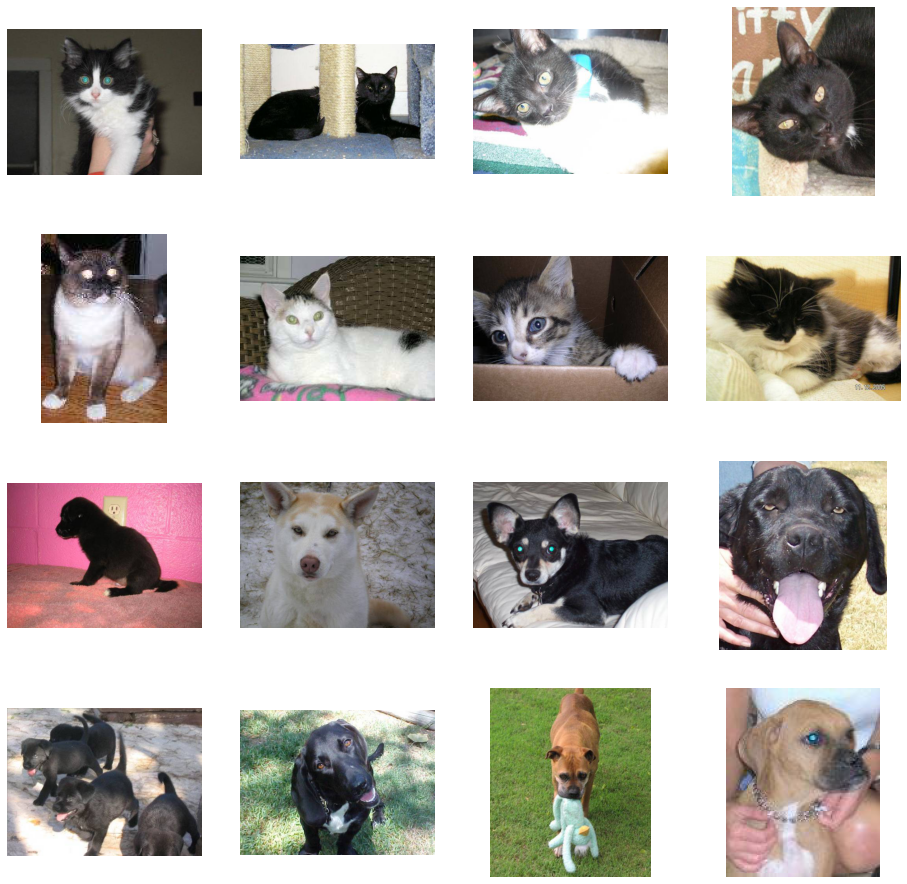

In [22]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
       for fname in train_cat_fnames[pic_index-8 : pic_index]
       ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
        for fname in train_dog_fnames[pic_index-8: pic_index]
        ]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')  # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
    optimizer=RMSprop(lr=0.001),
    metrics = ['accuracy']
    )

# Data Preprocessing

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode='binary'
    )

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
    )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training

In [13]:
history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=15,
            validation_data = validation_generator,
            validation_steps=50,
            verbose=2
            )

Epoch 1/15
100/100 - 40s - loss: 0.8399 - accuracy: 0.5590 - val_loss: 0.6558 - val_accuracy: 0.6180
Epoch 2/15
100/100 - 9s - loss: 0.6351 - accuracy: 0.6565 - val_loss: 0.6124 - val_accuracy: 0.6670
Epoch 3/15
100/100 - 8s - loss: 0.5736 - accuracy: 0.7120 - val_loss: 0.6176 - val_accuracy: 0.6580
Epoch 4/15
100/100 - 9s - loss: 0.4609 - accuracy: 0.7810 - val_loss: 0.6211 - val_accuracy: 0.6920
Epoch 5/15
100/100 - 8s - loss: 0.3763 - accuracy: 0.8420 - val_loss: 0.6222 - val_accuracy: 0.6960
Epoch 6/15
100/100 - 8s - loss: 0.2836 - accuracy: 0.8775 - val_loss: 0.6727 - val_accuracy: 0.7200
Epoch 7/15
100/100 - 9s - loss: 0.2006 - accuracy: 0.9160 - val_loss: 0.8334 - val_accuracy: 0.6930
Epoch 8/15
100/100 - 8s - loss: 0.1438 - accuracy: 0.9445 - val_loss: 0.8603 - val_accuracy: 0.7090
Epoch 9/15
100/100 - 9s - loss: 0.0945 - accuracy: 0.9680 - val_loss: 1.3679 - val_accuracy: 0.6930
Epoch 10/15
100/100 - 9s - loss: 0.0625 - accuracy: 0.9805 - val_loss: 1.3101 - val_accuracy: 0.681

# Running the Model

In [18]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])
    if classes[0] > 0:
        print(fn , ' is a dog.')
    else:
        print(fn, ' is a cat.')

Saving abc.jpg to abc (3).jpg
[1.]
abc.jpg  is a dog.


# Visualizing Intermediate Representations

In [19]:
import numpy as np
import random

from tensorflow.keras.preprocessing.image import img_to_array, load_img



# Evaluating Accuracy and Loss for the Model

Text(0.5, 1.0, 'Training and Validation loss')

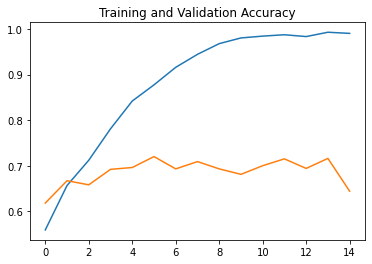

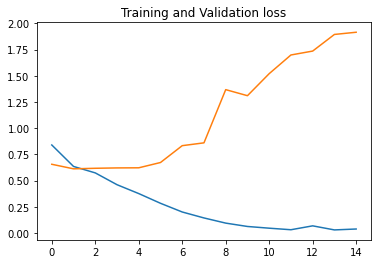

In [23]:
# Retrieve a list of list results on training and test data
# sets for each training epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))    # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and Validation Accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation loss')


As you can see, we are overfitting like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as 70%. Our validation loss reaches its minimum after only five epochs.